In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate,optimize, fftpack
from scipy.integrate import odeint

In [210]:
cases=pd.read_excel('NL, Ger.xlsx')

In [211]:
nedgov = pd.read_csv('NED_GOV.csv', sep=',')

In [212]:
gergov = pd.read_csv('GER_GOV.csv', sep=',')

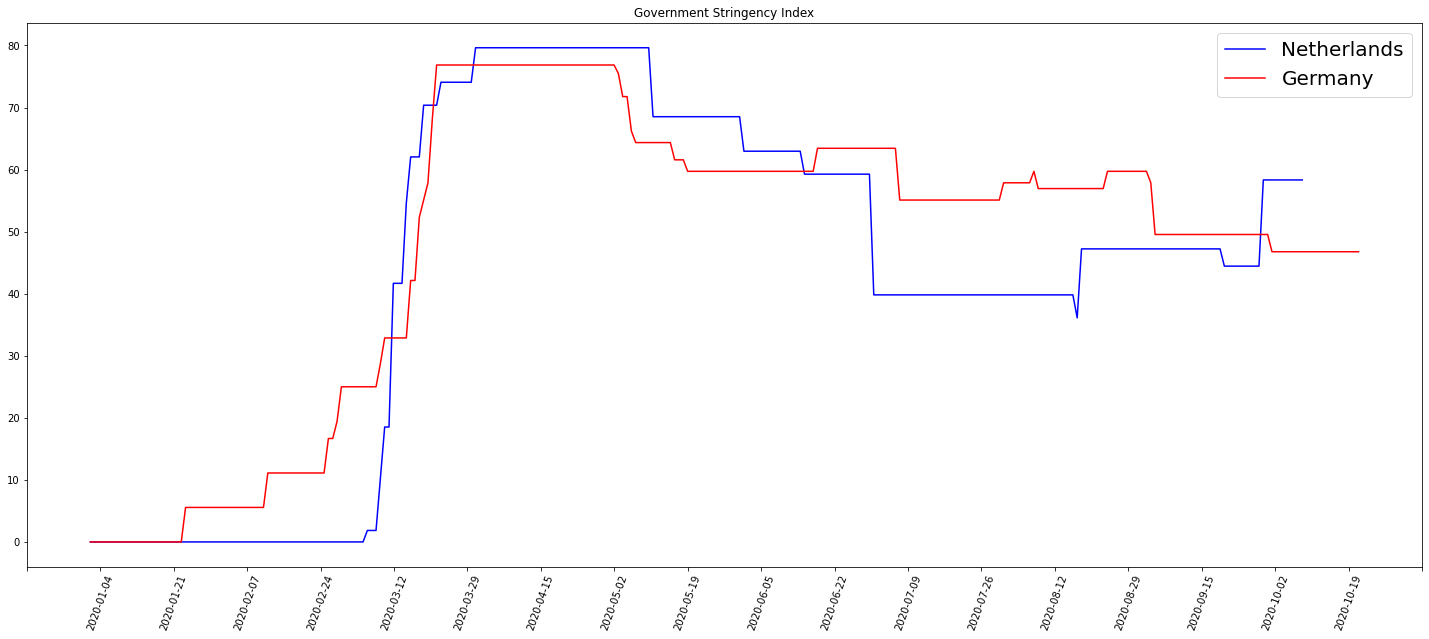

In [213]:
fig = plt.figure(figsize = (25,10))
plt.title("Government Stringency Index")
plt.plot(nedgov['2020-01-01'],nedgov['0'],'b',label = "Netherlands")
plt.plot(gergov['2020-01-01'],gergov['0'],'r',label = "Germany")
#plt.plot(dates, gercases)
#plt.plot(dates, nedcases)
plt.legend(fontsize = 20)
xmin, xmax = plt.xlim()
plt.xticks(rotation = 70)
plt.xticks(np.round(np.linspace(xmin,xmax,20),2))
plt.show()

In [214]:
cases.replace(np.NaN,0)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,DEU,Europe,Germany,2019-12-31,0.0,0,0.000,0.0,0,0.000,...,45229.245,0.0,156.139,8.31,28.2,33.1,0.0,8.00,81.33,0.936
1,DEU,Europe,Germany,2020-01-01,0.0,0,0.000,0.0,0,0.000,...,45229.245,0.0,156.139,8.31,28.2,33.1,0.0,8.00,81.33,0.936
2,DEU,Europe,Germany,2020-01-02,0.0,0,0.000,0.0,0,0.000,...,45229.245,0.0,156.139,8.31,28.2,33.1,0.0,8.00,81.33,0.936
3,DEU,Europe,Germany,2020-01-03,0.0,0,0.000,0.0,0,0.000,...,45229.245,0.0,156.139,8.31,28.2,33.1,0.0,8.00,81.33,0.936
4,DEU,Europe,Germany,2020-01-04,0.0,0,0.000,0.0,0,0.000,...,45229.245,0.0,156.139,8.31,28.2,33.1,0.0,8.00,81.33,0.936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,NLD,Europe,Netherlands,2020-10-18,219795.0,8105,7387.571,6728.0,29,24.286,...,48472.545,0.0,109.361,5.29,24.4,27.3,0.0,3.32,82.28,0.931
590,NLD,Europe,Netherlands,2020-10-19,228234.0,8439,7683.429,6751.0,23,25.143,...,48472.545,0.0,109.361,5.29,24.4,27.3,0.0,3.32,82.28,0.931
591,NLD,Europe,Netherlands,2020-10-20,235954.0,7720,7808.571,6759.0,8,24.571,...,48472.545,0.0,109.361,5.29,24.4,27.3,0.0,3.32,82.28,0.931
592,NLD,Europe,Netherlands,2020-10-21,244103.0,8149,7920.143,6804.0,45,26.000,...,48472.545,0.0,109.361,5.29,24.4,27.3,0.0,3.32,82.28,0.931


In [215]:
gercases = cases.iloc[0:297,4]
nedcases = cases.iloc[297:,4]
dates = cases.iloc[0:297,3]

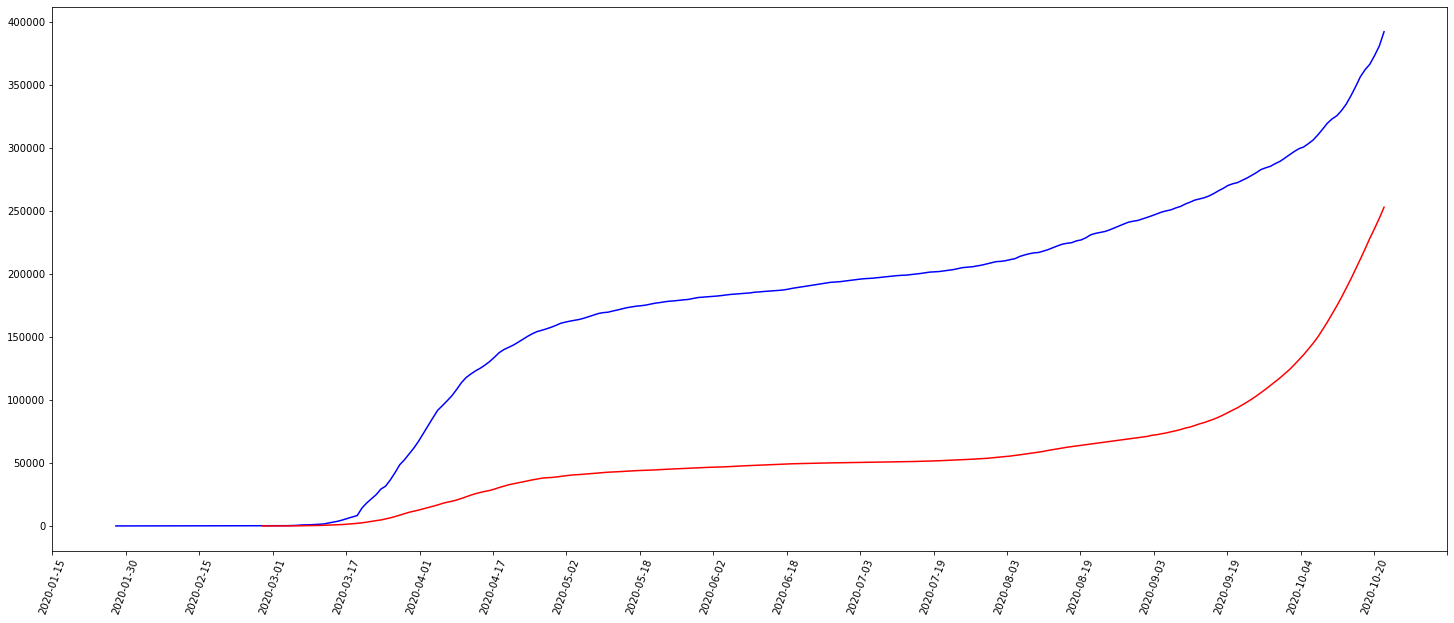

In [216]:
fig = plt.figure(figsize = (25,10))
plt.plot(dates,gercases,'b')
plt.plot(dates,nedcases,'r')
#plt.plot(gergov['2020-01-01'],gergov['0'],'r')
xmin, xmax = plt.xlim()
plt.xticks(rotation = 70)
plt.xticks(np.round(np.linspace(xmin,xmax,20),2))
plt.show()

In [217]:
cases.iloc[58:98,5]

58       4
59      26
60      10
61      54
62      18
63      28
64      39
65      66
66     138
67     284
68     163
69      55
70     237
71     157
72     271
73     802
74     693
75     733
76    1043
77    1174
78    1144
79    1042
80    5940
81    4049
82    3276
83    3311
84    4438
85    2342
86    4954
87    5780
88    6294
89    3965
90    4751
91    4615
92    5453
93    6156
94    6174
95    6082
96    5936
97    3677
Name: new_cases, dtype: int64

In [218]:
def derivation2(y,t,N,beta,gamma):
    S,I,R = y
    dSdt = - beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I / N
    return dSdt, dIdt, dRdt

In [225]:
    N = 80000000
    cases1 = np.array(cases.iloc[58:98,5])
    t = np.linspace(0,40,40)
    I0 = 4
    S0 = N - I0
    R0 = 0
    y = S0,I0,R0
    def fit_odeint(t, beta, gamma):
        return odeint(derivation2, y, t, args=(N,  beta, gamma))[:,1]
    
    popt, pcov = optimize.curve_fit(fit_odeint, t, cases1)
    fitted = fit_odeint(np.linspace(0, 40, 40), *popt)
    beta,gamma= popt
#     plt.plot(days, cases,'o', label = 'Data')
#     plt.plot(np.linspace(0, 15, 1000), fitted, label = 'Fitted model')
#     plt.legend()
#     plt.title('beta = 1.66 gamma = 0.45', size = 13)
#     plt.xlabel('Days', size = 13)
#     plt.ylabel('Number of cases', size = 13)
#     plt.show()
    print(beta,gamma)



20.559733948334983 20.29993742078563


/Users/romanpeerboom/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [224]:
type(cases1)

numpy.ndarray